### Scraping Data

In [339]:
import requests
import os
import shutil

In [546]:
years = list(range(1991,2023))

In [341]:
url_start = "https://www.basketball-reference.com/awards/awards_{}.html"

for year in years:
    url = url_start.format(year)
    
    data = requests.get(url)
    
    with open("mvp/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(data.text)

In [342]:
from bs4 import BeautifulSoup

In [343]:
with open("mvp/1991.html",encoding="utf-8") as f:
    page = f.read()
    
soup = BeautifulSoup(page, 'html.parser')
soup.find('tr', class_="over_header").decompose()

In [344]:
mvp_table = soup.find_all(id="mvp")[0]

In [345]:
import pandas as pd

In [346]:
mvp_1991 = pd.read_html(str(mvp_table))[0]

In [347]:
mvp_1991.head(1)

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,PTS,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,31.5,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321


In [348]:
mvp_1991["Year"] = 1991

In [349]:
mvp_1991.head()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
0,1,Michael Jordan,27,CHI,77.0,891.0,960,0.928,82,37.0,...,6.0,5.5,2.7,1.0,0.539,0.312,0.851,20.3,0.321,1991
1,2,Magic Johnson,31,LAL,10.0,497.0,960,0.518,79,37.1,...,7.0,12.5,1.3,0.2,0.477,0.320,0.906,15.4,0.251,1991
2,3,David Robinson,25,SAS,6.0,476.0,960,0.496,82,37.7,...,13.0,2.5,1.5,3.9,0.552,0.143,0.762,17.0,0.264,1991
3,4,Charles Barkley,27,PHI,2.0,222.0,960,0.231,67,37.3,...,10.1,4.2,1.6,0.5,0.570,0.284,0.722,13.4,0.258,1991
4,5,Karl Malone,27,UTA,0.0,142.0,960,0.148,82,40.3,...,11.8,3.3,1.1,1.0,0.527,0.286,0.770,15.5,0.225,1991


In [350]:
dfs = []
for year in years:
    with open("mvp/{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="over_header").decompose()
    mvp_table = soup.find_all(id="mvp")[0]
    mvp_df = pd.read_html(str(mvp_table))[0]
    mvp_df["Year"] = year
    dfs.append(mvp_df)

In [351]:
mvps = pd.concat(dfs)

mvps.tail()

,Rank,Player,Age,Tm,First,Pts Won,Pts Max,Share,G,MP,...,TRB,AST,STL,BLK,FG%,3P%,FT%,WS,WS/48,Year
7,8,Stephen Curry,33,GSW,0.0,4.0,1000,0.004,64,34.5,...,5.2,6.3,1.3,0.4,0.437,0.380,0.923,8.0,0.173,2022
8,9,Chris Paul,36,PHO,0.0,2.0,1000,0.002,65,32.9,...,4.4,10.8,1.9,0.3,0.493,0.317,0.837,9.4,0.210,2022
9,10T,DeMar DeRozan,32,CHI,0.0,1.0,1000,0.001,76,36.1,...,5.2,4.9,0.9,0.3,0.504,0.352,0.877,8.8,0.154,2022
10,10T,Kevin Durant,33,BRK,0.0,1.0,1000,0.001,55,37.2,...,7.4,6.4,0.9,0.9,0.518,0.383,0.910,8.4,0.198,2022
11,10T,LeBron James,37,LAL,0.0,1.0,1000,0.001,56,37.2,...,8.2,6.2,1.3,1.1,0.524,0.359,0.756,7.5,0.172,2022


In [352]:
mvps.to_csv("mvps.csv")

In [353]:
player_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_per_game.html"

for year in years:
    url = player_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("player/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(data.text)

In [354]:
import os
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

# install selenium chrome driver from https://chromedriver.chromium.org/downloads
# xattr -d com.apple.quarantine chromedriver

In [355]:
driver = webdriver.Chrome(
    executable_path="D:\Work\project-walkthroughs-master\mvp\driver\chromedriver"
    )

In [356]:
for year in years:
    url = player_stats_url.format(year)
    
    driver.get(url)
    driver.execute_script("window.scrollTo(1,10000)")
    time.sleep(2)
    
    with open("player/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(driver.page_source)

In [357]:
dfs = []
for year in years:
    with open("player/{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    player_table = soup.find_all(id="per_game_stats")[0]
    player_df = pd.read_html(str(player_table))[0]
    player_df["Year"] = year
    dfs.append(player_df)

In [358]:
players = pd.concat(dfs)

In [359]:
players.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
0,1,Alaa Abdelnaby,PF,22,POR,43,0,6.7,1.3,2.7,...,0.6,1.4,2.1,0.3,0.1,0.3,0.5,0.9,3.1,1991
1,2,Mahmoud Abdul-Rauf,PG,21,DEN,67,19,22.5,6.2,15.1,...,0.5,1.3,1.8,3.1,0.8,0.1,1.6,2.2,14.1,1991
2,3,Mark Acres,C,28,ORL,68,0,19.3,1.6,3.1,...,2.1,3.2,5.3,0.4,0.4,0.4,0.6,3.2,4.2,1991
3,4,Michael Adams,PG,28,DEN,66,66,35.5,8.5,21.5,...,0.9,3.0,3.9,10.5,2.2,0.1,3.6,2.5,26.5,1991
4,5,Mark Aguirre,SF,31,DET,78,13,25.7,5.4,11.7,...,1.7,3.1,4.8,1.8,0.6,0.3,1.6,2.7,14.2,1991


In [360]:
players.to_csv("players.csv")

In [361]:
team_stats_url = "https://www.basketball-reference.com/leagues/NBA_{}_standings.html"

In [362]:
for year in years:
    url = team_stats_url.format(year)
    
    data = requests.get(url)
    
    with open("team/{}.html".format(year), "w+",encoding="utf-8") as f:
        f.write(data.text)

In [363]:
dfs = []
for year in years:
    with open("team/{}.html".format(year),encoding="utf-8") as f:
        page = f.read()
    
    soup = BeautifulSoup(page, 'html.parser')
    soup.find('tr', class_="thead").decompose()
    e_table = soup.find_all(id="divs_standings_E")[0]
    e_df = pd.read_html(str(e_table))[0]
    e_df["Year"] = year
    e_df["Team"] = e_df["Eastern Conference"]
    del e_df["Eastern Conference"]
    dfs.append(e_df)
    
    w_table = soup.find_all(id="divs_standings_W")[0]
    w_df = pd.read_html(str(w_table))[0]
    w_df["Year"] = year
    w_df["Team"] = w_df["Western Conference"]
    del w_df["Western Conference"]
    dfs.append(w_df)

In [364]:
teams = pd.concat(dfs)

In [365]:
teams.tail()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
13,56,26,.683,—,115.6,109.9,5.37,2022,Memphis Grizzlies*
14,52,30,.634,4.0,108.0,104.7,3.12,2022,Dallas Mavericks*
15,36,46,.439,20.0,109.3,110.3,-0.84,2022,New Orleans Pelicans*
16,34,48,.415,22.0,113.2,113.0,0.02,2022,San Antonio Spurs
17,20,62,.244,36.0,109.7,118.2,-8.26,2022,Houston Rockets


In [366]:
teams.head()

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets


In [367]:
teams.to_csv("teams.csv")

### Data Cleaning

In [458]:
players = pd.read_csv("players.csv", index_col=0)
mvps = pd.read_csv("mvps.csv", index_col=0)
teams = pd.read_csv("teams.csv", index_col=0)

In [459]:
mvps = mvps.loc[:,['Player','Pts Won','Pts Max','Share','Year']]

In [460]:
mvps.head()

,Player,Pts Won,Pts Max,Share,Year
0,Michael Jordan,891.0,960,0.928,1991
1,Magic Johnson,497.0,960,0.518,1991
2,David Robinson,476.0,960,0.496,1991
3,Charles Barkley,222.0,960,0.231,1991
4,Karl Malone,142.0,960,0.148,1991


In [461]:
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18885 entries, 0 to 840
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rk      18885 non-null  object
 1   Player  18885 non-null  object
 2   Pos     18885 non-null  object
 3   Age     18885 non-null  object
 4   Tm      18885 non-null  object
 5   G       18885 non-null  object
 6   GS      18885 non-null  object
 7   MP      18885 non-null  object
 8   FG      18885 non-null  object
 9   FGA     18885 non-null  object
 10  FG%     18779 non-null  object
 11  3P      18885 non-null  object
 12  3PA     18885 non-null  object
 13  3P%     16029 non-null  object
 14  2P      18885 non-null  object
 15  2PA     18885 non-null  object
 16  2P%     18709 non-null  object
 17  eFG%    18779 non-null  object
 18  FT      18885 non-null  object
 19  FTA     18885 non-null  object
 20  FT%     17994 non-null  object
 21  ORB     18885 non-null  object
 22  DRB     18885 non-null  

In [462]:
players.drop(['Rk'],axis=1,inplace=True)   

In [463]:
players['Player'].head(50)

0         Alaa Abdelnaby
1     Mahmoud Abdul-Rauf
2             Mark Acres
3          Michael Adams
4           Mark Aguirre
5            Danny Ainge
6            Mark Alarie
7           Steve Alford
8          Greg Anderson
9          Greg Anderson
10         Greg Anderson
11         Greg Anderson
12         Nick Anderson
13          Ron Anderson
14       Willie Anderson
15        Michael Ansley
16        B.J. Armstrong
17         Vincent Askew
18          Keith Askins
19           Miloš Babić
20          Thurl Bailey
21           Cedric Ball
22         Ken Bannister
23      Charles Barkley*
24           Dana Barros
25           John Battle
26          Kenny Battle
27          Kenny Battle
28          Kenny Battle
29       William Bedford
30       Benoit Benjamin
31       Benoit Benjamin
32       Benoit Benjamin
33       Winston Bennett
34           Larry Bird*
35      Rolando Blackman
36          Lance Blanks
37       Mookie Blaylock
38         Muggsy Bogues
39            Manute Bol


In [464]:
players['Player'] = players['Player'].str.replace("*","",regex=False)

In [465]:
players[players['Player'] == 'A.C. Green']

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Year
164,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,.476,...,2.5,3.8,6.3,0.9,0.7,0.3,1.2,1.4,9.1,1991
174,A.C. Green,PF,28,LAL,82,53,35.4,4.7,9.8,.476,...,3.7,5.6,9.3,1.4,1.1,0.4,1.4,1.7,13.6,1992
157,A.C. Green,PF,29,LAL,82,55,34.4,4.6,8.6,.537,...,3.5,5.2,8.7,1.4,1.1,0.5,1.4,1.8,12.8,1993
177,A.C. Green,PF,30,PHO,82,55,34.5,5.7,11.3,.502,...,3.4,5.8,9.2,1.7,0.9,0.5,1.2,1.7,14.7,1994
165,A.C. Green,SF,31,PHO,82,52,32.8,3.8,7.5,.504,...,2.4,5.8,8.2,1.5,0.7,0.4,1.4,1.8,11.2,1995
190,A.C. Green,SF,32,PHO,82,36,25.8,2.6,5.4,.484,...,2.0,4.7,6.8,0.9,0.5,0.3,1.0,1.7,7.5,1996
200,A.C. Green,PF,33,TOT,83,73,30.0,2.8,5.8,.483,...,2.7,5.2,7.9,0.8,0.8,0.2,0.9,1.7,7.2,1997
201,A.C. Green,PF,33,PHO,27,19,20.3,2.3,4.7,.477,...,1.2,3.9,5.1,0.6,0.7,0.0,0.7,1.3,5.7,1997
202,A.C. Green,PF,33,DAL,56,54,34.7,3.1,6.4,.486,...,3.4,5.9,9.3,0.9,0.9,0.3,1.0,2.0,7.9,1997
192,A.C. Green,PF,34,DAL,82,68,32.3,3.0,6.5,.453,...,2.7,5.5,8.1,1.5,1.0,0.3,0.8,1.9,7.3,1998


In [466]:
def group_players(df):
    if df.shape[0]==1:
        return df.drop(['Player','Year'],axis=1)
    else:
        row = df[df['Tm']=='TOT']
        row['Tm'] = df.iloc[-1,:]['Tm']
        return row.drop(['Player','Year'],axis=1)

In [467]:
players=players.groupby(['Player','Year']).apply(group_players)
players

Pos Age   Tm   G  GS    MP   FG   FGA   FG%   3P  ...  \
Player         Year                                                       ...   
A.C. Green     1991 164  PF  27  LAL  82  21  26.4  3.1   6.6  .476  0.1  ...   
               1992 174  PF  28  LAL  82  53  35.4  4.7   9.8  .476  0.1  ...   
               1993 157  PF  29  LAL  82  55  34.4  4.6   8.6  .537  0.2  ...   
               1994 177  PF  30  PHO  82  55  34.5  5.7  11.3  .502  0.1  ...   
               1995 165  SF  31  PHO  82  52  32.8  3.8   7.5  .504  0.5  ...   
...                      ..  ..  ...  ..  ..   ...  ...   ...   ...  ...  ...   
Željko Rebrača 2002 394   C  29  DET  74   4  15.9  2.6   5.1  .505  0.0  ...   
               2003 374   C  30  DET  30  12  16.3  2.7   4.8  .552  0.0  ...   
               2004 452   C  31  ATL  24   2  11.4  1.4   3.2  .442  0.0  ...   
               2005 446   C  32  LAC  58   2  16.0  2.3   4.0  .568  0.0  ...   
               2006 433   C  33  LAC  29   2  14.2  1.8   3.3  .542  0.0  ...   

                          FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
Player         Year                                                          
A.C. Green     1991 164  .738  2.5  3.8  6.3  0.9  0.7  0.3  1.2  1.4   9.1  
               1992 174  .744  3.7  5.6  9.3  1.4  1.1  0.4  1.4  1.7  13.6  
               1993 157  .739  3.5  5.2  8.7  1.4  1.1  0.5  1.4  1.8  12.8  
               1994 177  .735  3.4  5.8  9.2  1.7  0.9  0.5  1.2  1.7  14.7  
               1995 165  .732  2.4  5.8  8.2  1.5  0.7  0.4  1.4  1.8  11.2  
...                       ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
Željko Rebrača 2002 394  .771  1.1  2.8  3.9  0.5  0.4  1.0  1.1  2.6   6.9  
               2003 374  .792  0.9  2.2  3.1  0.3  0.2  0.6  1.0  2.6   6.6  
               2004 452  .767  1.0  1.5  2.4  0.3  0.2  0.5  0.7  2.2   3.8  
               2005 446  .859  0.8  2.3  3.2  0.4  0.2  0.7  0.8  2.2   5.8  
               2006 433  .756  0.4  1.8  2.2  0.3  0.2  0.7  0.8  2.0   4.7  

[14697 rows x 28 columns]

In [468]:
players = players.reset_index()
players[players['Player'] == 'Greg Anderson']

,Player,Year,level_2,Pos,Age,Tm,G,GS,MP,FG,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
5385,Greg Anderson,1991,8,PF,26,DEN,68,2,13.6,1.7,...,.522,1.4,3.3,4.7,0.2,0.5,0.7,1.2,2.1,4.3
5386,Greg Anderson,1992,8,PF,27,DEN,82,82,34.1,4.7,...,.623,4.1,7.4,11.5,1.0,1.1,0.8,2.5,3.2,11.5
5387,Greg Anderson,1994,10,PF,29,DET,77,47,21.1,2.6,...,.571,2.4,5.0,7.4,0.7,0.7,0.9,1.2,3.0,6.4
5388,Greg Anderson,1995,9,PF,30,ATL,51,0,12.2,1.1,...,.479,1.2,2.5,3.7,0.3,0.5,0.6,0.6,2.0,2.9
5389,Greg Anderson,1996,8,PF,31,SAS,46,7,7.5,0.5,...,.240,0.6,1.5,2.2,0.2,0.2,0.5,0.5,1.4,1.2
5390,Greg Anderson,1997,10,C,32,SAS,82,48,20.2,1.6,...,.667,1.9,3.5,5.5,0.4,0.8,0.8,0.9,2.7,3.9
5391,Greg Anderson,1998,8,C,33,ATL,50,0,8.0,0.7,...,.390,0.8,1.6,2.4,0.3,0.4,0.2,0.3,1.7,1.8


In [469]:
combined=players.merge(mvps,how='outer', on=['Player','Year'])

In [470]:
combined.drop('level_2',axis=1,inplace=True)

In [471]:
combined[combined['Pts Won'] > 0]

,Player,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Pts Won,Pts Max,Share
197,Al Jefferson,2014,C,29,CHA,73,73,35.0,9.6,18.8,...,10.8,2.1,0.9,1.1,1.7,2.4,21.8,34.0,1250.0,0.027
346,Allen Iverson,1997,PG,21,PHI,76,74,40.1,8.2,19.8,...,4.1,7.5,2.1,0.3,4.4,3.1,23.5,1.0,1150.0,0.001
348,Allen Iverson,1999,SG,23,PHI,48,48,41.5,9.1,22.0,...,4.9,4.6,2.3,0.1,3.5,2.0,26.8,319.0,1180.0,0.270
349,Allen Iverson,2000,SG,24,PHI,70,70,40.8,10.4,24.8,...,3.8,4.7,2.1,0.1,3.3,2.3,28.4,132.0,1210.0,0.109
350,Allen Iverson,2001,SG,25,PHI,71,71,42.0,10.7,25.5,...,3.8,4.6,2.5,0.3,3.3,2.1,31.1,1121.0,1240.0,0.904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,Vince Carter,2000,SF,23,TOR,82,82,38.1,9.6,20.7,...,5.8,3.9,1.3,1.1,2.2,3.2,25.7,51.0,1210.0,0.042
14171,Vince Carter,2001,SF,24,TOR,75,75,39.7,10.2,22.1,...,5.5,3.9,1.5,1.1,2.2,2.7,27.6,7.0,1240.0,0.006
14175,Vince Carter,2005,SF-SG,28,NJN,77,76,36.7,9.0,20.0,...,5.2,4.2,1.4,0.6,2.2,3.2,24.5,3.0,1270.0,0.002
14549,Yao Ming,2004,C,23,HOU,82,82,32.8,6.5,12.5,...,9.0,1.5,0.3,1.9,2.5,3.3,17.5,1.0,1230.0,0.001


In [472]:
combined[['Pts Won','Pts Max','Share']] = combined[['Pts Won','Pts Max','Share']].fillna(0)

In [473]:
combined

,Player,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TRB,AST,STL,BLK,TOV,PF,PTS,Pts Won,Pts Max,Share
0,A.C. Green,1991,PF,27,LAL,82,21,26.4,3.1,6.6,...,6.3,0.9,0.7,0.3,1.2,1.4,9.1,0.0,0.0,0.0
1,A.C. Green,1992,PF,28,LAL,82,53,35.4,4.7,9.8,...,9.3,1.4,1.1,0.4,1.4,1.7,13.6,0.0,0.0,0.0
2,A.C. Green,1993,PF,29,LAL,82,55,34.4,4.6,8.6,...,8.7,1.4,1.1,0.5,1.4,1.8,12.8,0.0,0.0,0.0
3,A.C. Green,1994,PF,30,PHO,82,55,34.5,5.7,11.3,...,9.2,1.7,0.9,0.5,1.2,1.7,14.7,0.0,0.0,0.0
4,A.C. Green,1995,SF,31,PHO,82,52,32.8,3.8,7.5,...,8.2,1.5,0.7,0.4,1.4,1.8,11.2,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14692,Željko Rebrača,2002,C,29,DET,74,4,15.9,2.6,5.1,...,3.9,0.5,0.4,1.0,1.1,2.6,6.9,0.0,0.0,0.0
14693,Željko Rebrača,2003,C,30,DET,30,12,16.3,2.7,4.8,...,3.1,0.3,0.2,0.6,1.0,2.6,6.6,0.0,0.0,0.0
14694,Željko Rebrača,2004,C,31,ATL,24,2,11.4,1.4,3.2,...,2.4,0.3,0.2,0.5,0.7,2.2,3.8,0.0,0.0,0.0
14695,Željko Rebrača,2005,C,32,LAC,58,2,16.0,2.3,4.0,...,3.2,0.4,0.2,0.7,0.8,2.2,5.8,0.0,0.0,0.0


In [474]:
teams.head(30)

,W,L,W/L%,GB,PS/G,PA/G,SRS,Year,Team
0,56,26,.683,—,111.5,105.7,5.22,1991,Boston Celtics*
1,44,38,.537,12.0,105.4,105.6,-0.39,1991,Philadelphia 76ers*
2,39,43,.476,17.0,103.1,103.3,-0.43,1991,New York Knicks*
3,30,52,.366,26.0,101.4,106.4,-4.84,1991,Washington Bullets
4,26,56,.317,30.0,102.9,107.5,-4.53,1991,New Jersey Nets
5,24,58,.293,32.0,101.8,107.8,-5.91,1991,Miami Heat
6,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,Central Division,1991,Central Division
7,61,21,.744,—,110.0,101.0,8.57,1991,Chicago Bulls*
8,50,32,.610,11.0,100.1,96.8,3.08,1991,Detroit Pistons*
9,48,34,.585,13.0,106.4,104.0,2.33,1991,Milwaukee Bucks*


In [475]:
teams = teams[~teams['W'].str.contains('Division')]
teams['Team'] = teams['Team'].str.replace("*","",regex=False)

In [476]:
combined['Tm'].unique()

array(['LAL', 'PHO', 'DAL', 'MIA', 'CLE', 'WSB', 'CHI', 'GSW', 'IND',
       'WAS', 'MIN', 'BOS', 'HOU', 'DEN', 'ORL', 'NOH', 'TOR', 'SAC',
       'CHO', 'PHI', 'POR', 'DET', 'OKC', 'UTA', 'MIL', 'VAN', 'SEA',
       'NJN', 'NOK', 'LAC', 'ATL', 'CHA', 'MEM', 'NYK', 'NOP', 'BRK',
       'SAS', 'CHH'], dtype=object)

In [477]:
nicknames = {}
with open('nicknames.txt') as f:
    lines = f.readlines()
    for line in lines[1:]:
        abbrev,name=line.replace("\n","").split(',')
        nicknames[abbrev] = name

In [478]:
combined['Team']=combined['Tm'].map(nicknames)

In [479]:
stats = combined.merge(teams,how='outer',on=['Team','Year'])

In [480]:
stats['GB'].unique()

array(['5.0', '14.0', '23.0', '7.0', '—', '40.0', '42.0', '18.0', '6.0',
       '24.0', '26.0', '37.0', '29.0', '21.0', '28.0', '25.0', '8.0',
       '19.0', '1.0', '13.0', '17.0', '3.0', '15.0', '9.0', '2.0', '35.0',
       '20.0', '11.0', '16.0', '41.0', '12.0', '50.0', '10.0', '30.0',
       '34.0', '4.0', '1.5', '22.0', '51.0', '36.0', '43.0', '39.0',
       '18.5', '31.0', '48.0', '46.0', '10.5', '32.0', '38.0', '27.0',
       '33.0', '21.5', '45.0', '22.5', '25.5', '3.5', '20.5', '11.5',
       '44.0', '52.0', '56.0', '2.5', '12.5', '47.0', '32.5', '4.5'],
      dtype=object)

In [481]:
stats['GB'] = stats['GB'].replace('—','0')

In [482]:
stats = stats.apply(pd.to_numeric,errors='ignore')
stats.dtypes

Player      object
Year         int64
Pos         object
Age          int64
Tm          object
G            int64
GS           int64
MP         float64
FG         float64
FGA        float64
FG%        float64
3P         float64
3PA        float64
3P%        float64
2P         float64
2PA        float64
2P%        float64
eFG%       float64
FT         float64
FTA        float64
FT%        float64
ORB        float64
DRB        float64
TRB        float64
AST        float64
STL        float64
BLK        float64
TOV        float64
PF         float64
PTS        float64
Pts Won    float64
Pts Max    float64
Share      float64
Team        object
W            int64
L            int64
W/L%       float64
GB         float64
PS/G       float64
PA/G       float64
SRS        float64
dtype: object

In [483]:
stats.to_csv('player_mvp_stats.csv')

### Data Visualization

<AxesSubplot:xlabel='Year'>

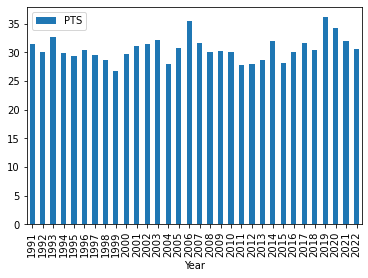

In [484]:
stats.groupby('Year').apply(lambda x: x.sort_values("PTS",ascending= False).head(1)).plot.bar('Year','PTS')

<AxesSubplot:>

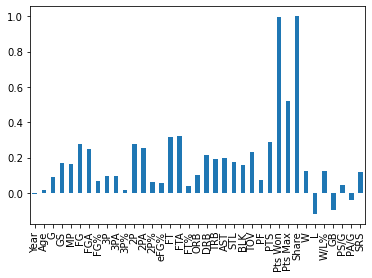

In [485]:
stats.corr()['Share'].plot.bar()

In [486]:
stats.head()

,Player,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,1991,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,Byron Scott,1991,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,Elden Campbell,1991,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,Irving Thomas,1991,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,James Worthy,1991,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73


### Preparing Data for Model

<AxesSubplot:>

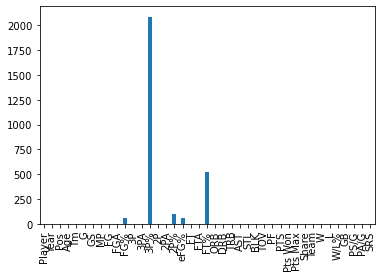

In [487]:
pd.isnull(stats).sum().plot.bar()

In [488]:
stats = stats.fillna(0)

In [489]:
stats.columns

Index(['Player', 'Year', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [490]:
pred = ['Year', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA',
       'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA',
       'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']

In [491]:
train = stats[stats['Year'] < 2021]
test = stats[stats['Year'] == 2021]

### Regression Model

In [492]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)
reg.fit(train[pred],train['Share'])

Ridge(alpha=0.1)

In [493]:
predictions = reg.predict(test[pred])

In [494]:
predictions = pd.DataFrame(predictions, columns=['predictions'],index=test.index)

In [495]:
predictions

,predictions
630,0.013567
631,-0.013756
632,0.002414
633,-0.004421
634,0.010734
...,...
14502,-0.012571
14503,-0.011575
14504,0.016424
14505,-0.020434


In [496]:
combination = pd.concat([test[['Player','Share']],predictions],axis=1)

In [497]:
combination['Share'].value_counts()

0.000    525
0.001      3
0.961      1
0.138      1
0.010      1
0.020      1
0.449      1
0.005      1
0.038      1
0.003      1
0.580      1
0.345      1
0.042      1
0.008      1
Name: Share, dtype: int64

In [498]:
combination = combination.sort_values("Share", ascending=False)
combination['Rk'] = list(range(1, combination.shape[0]+1))

In [499]:
combination = combination.sort_values('predictions', ascending=False)
combination['Prediction_Rk'] = list(range(1, combination.shape[0]+1))

In [500]:
combination

,Player,Share,predictions,Rk,Prediction_Rk
10338,Giannis Antetokounmpo,0.345,0.207436,4,1
9018,Joel Embiid,0.580,0.162713,2,2
641,Nikola Jokić,0.961,0.154306,1,3
11449,Luka Dončić,0.042,0.151430,6,4
3928,LeBron James,0.001,0.147512,15,5
...,...,...,...,...,...
9868,Patrick McCaw,0.000,-0.050344,113,536
14081,Killian Hayes,0.000,-0.051316,200,537
10346,P.J. Tucker,0.000,-0.054995,33,538
4074,Anžejs Pasečņiks,0.000,-0.062399,489,539


In [501]:
from sklearn.metrics import mean_squared_error
mean_squared_error(combination['Share'],combination['predictions'])

0.0026668960013828554

In [502]:
combination.sort_values("Share", ascending=False).head(10)

,Player,Share,predictions,Rk,Prediction_Rk
641,Nikola Jokić,0.961,0.154306,1,3
9018,Joel Embiid,0.580,0.162713,2,2
3843,Stephen Curry,0.449,0.142386,3,6
10338,Giannis Antetokounmpo,0.345,0.207436,4,1
1499,Chris Paul,0.138,0.072293,5,33
11449,Luka Dončić,0.042,0.151430,6,4
7759,Damian Lillard,0.038,0.116303,7,12
3707,Julius Randle,0.020,0.088877,8,24
3702,Derrick Rose,0.010,0.033001,9,76
11871,Rudy Gobert,0.008,0.095350,10,19


### Analysing Error Metric

In [503]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [504]:
find_ap(combination)

0.7636363636363636

In [505]:
years = list(range(1991,2022))

In [506]:
aps = []
all_predictions = []
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[pred],train["Share"])
    predictions = reg.predict(test[pred])
    predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
    combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
    all_predictions.append(combination)
    aps.append(find_ap(combination))

In [507]:
sum(aps) / len(aps)

0.7112884360789578

In [508]:
def add_ranks(predictions):
    predictions = predictions.sort_values("predictions", ascending=False)
    predictions["Predicted_Rk"] = list(range(1,predictions.shape[0]+1))
    predictions = predictions.sort_values("Share", ascending=False)
    predictions["Rk"] = list(range(1,predictions.shape[0]+1))
    predictions["Diff"] = (predictions["Rk"] - predictions["Predicted_Rk"])
    return predictions

In [509]:
ranking=add_ranks(all_predictions[1])
ranking[ranking['Rk']<6].sort_values('Diff',ascending=False)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
1710,Karl Malone,0.857,0.192318,2,1,-1
10976,Michael Jordan,0.832,0.167629,3,2,-1
970,Grant Hill,0.327,0.128646,6,3,-3
4912,Tim Hardaway,0.207,0.059984,20,4,-16
8642,Glen Rice,0.117,0.033110,53,5,-48


In [510]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [511]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], pred)

In [512]:
mean_ap

0.7112884360789578

In [573]:
all_predictions[all_predictions["Rk"] < 5].sort_values("Diff").head(10)

,Player,Share,predictions,Predicted_Rk,Rk,Diff
907,Devin Booker,0.216,0.095026,13,4,-9
641,Nikola Jokić,0.961,0.143975,3,1,-2
3843,Stephen Curry,0.449,0.141596,5,3,-2
663,Nikola Jokić,0.875,0.189082,2,1,-1
837,Joel Embiid,0.706,0.171727,3,2,-1
9018,Joel Embiid,0.580,0.150510,2,2,0
11678,Giannis Antetokounmpo,0.595,0.208312,1,3,2
10338,Giannis Antetokounmpo,0.345,0.199173,1,4,3


In [514]:
pd.concat([pd.Series(reg.coef_),pd.Series(pred)],axis=1).sort_values(0,ascending=False)

,0,1
14,0.070001,eFG%
19,0.035041,DRB
29,0.027125,W/L%
18,0.021610,ORB
11,0.016945,2P
22,0.011635,STL
16,0.011351,FTA
23,0.011234,BLK
21,0.007455,AST
26,0.005894,PTS


### Imporving Model

In [515]:
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [516]:
stats[["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]
pred += ["PTS_R", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [517]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], pred)

In [518]:
mean_ap

0.7208380973034985

In [519]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes
stats["NTm"] = stats["Tm"].astype("category").cat.codes

### Using Random Forest

In [568]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=80, random_state=1, min_samples_split=3)

mean_ap, aps, all_predictions = backtest(stats, rf, years[30:], pred + ["NPos", "NTm"])

In [569]:
mean_ap

0.8089583333333332

In [571]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[30:], pred)

In [572]:
mean_ap

0.8336130536130537

### Scaling Data

In [300]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

In [200]:
def backtest(stats, model, years, predictors):
    aps = []
    all_predictions = []
    for year in years:
        train = stats[stats["Year"] < year].copy()
        test = stats[stats["Year"] == year].copy()
        sc.fit(train[predictors])
        train[predictors] = sc.transform(train[predictors])
        test[predictors] = sc.transform(test[predictors])
        model.fit(train[predictors],train["Share"])
        predictions = model.predict(test[predictors])
        predictions = pd.DataFrame(predictions, columns=["predictions"], index=test.index)
        combination = pd.concat([test[["Player", "Share"]], predictions], axis=1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_ap(combination))
    return sum(aps) / len(aps), aps, pd.concat(all_predictions)

In [202]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[28:], pred) 

In [203]:
mean_ap

0.7981818181818182

## Predicting 2022 Top 5 MVP

In [574]:
train = stats[stats['Year'] < 2022]
test = stats[stats['Year'] == 2022]

In [575]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=0.1)
reg.fit(train[pred],train['Share'])

Ridge(alpha=0.1)

In [576]:
predictions = reg.predict(test[pred])
predictions = pd.DataFrame(predictions, columns=['predictions'],index=test.index)

In [577]:
combination = pd.concat([test[['Player','Share']],predictions],axis=1)

In [578]:
combination

,Player,Share,predictions
648,Aaron Gordon,0.0,0.011726
649,Austin Rivers,0.0,-0.025168
650,Bol Bol,0.0,-0.000478
651,Bones Hyland,0.0,0.020038
652,Bryn Forbes,0.0,0.001726
...,...,...,...
12508,Micah Potter,0.0,-0.018545
12509,Rodney McGruder,0.0,-0.006229
12510,Saben Lee,0.0,0.001444
12511,Saddiq Bey,0.0,0.005831


In [579]:
combination = combination.sort_values("Share", ascending=False)
combination["Rk"] = list(range(1,combination.shape[0]+1))

In [580]:
combination = combination.sort_values("predictions", ascending=False)
combination["Predicted_Rk"] = list(range(1,combination.shape[0]+1))

In [591]:
combination.head(20)

,Player,Share,predictions,Rk,Predicted_Rk
11678,Giannis Antetokounmpo,0.595,0.208312,3,1
663,Nikola Jokić,0.875,0.189082,1,2
837,Joel Embiid,0.706,0.171727,2,3
11469,Luka Dončić,0.146,0.157870,5,4
8241,LeBron James,0.001,0.155714,10,5
6185,Kevin Durant,0.001,0.138405,12,6
12226,Ja Morant,0.010,0.122199,7,7
11820,Trae Young,0.000,0.120118,289,8
3938,DeMar DeRozan,0.001,0.101188,11,9
6398,Stephen Curry,0.004,0.099062,8,10


In [582]:
from sklearn.metrics import mean_squared_error
mean_squared_error(combination['Share'],combination['predictions'])

0.002274362381209982

In [583]:
def find_ap(combination):
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending=False)
    ps = []
    found = 0
    seen = 1
    for index,row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found / seen)
        seen += 1

    return sum(ps) / len(ps)

In [584]:
find_ap(combination)

0.876923076923077

In [585]:
this=stats[stats['Year'] == 2022]

In [586]:
this[this['Player'] == 'LeBron James']

,Player,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
8241,LeBron James,2022,PF,37,LAL,56,56,37.2,11.4,21.8,...,112.1,115.1,-3.08,3.677037,3.318588,2.142468,2.976297,3.167539,2,15


In [587]:
this[this['Player'] == 'Giannis Antetokounmpo']

,Player,Year,Pos,Age,Tm,G,GS,MP,FG,FGA,...,PS/G,PA/G,SRS,PTS_R,AST_R,STL_R,BLK_R,3P_R,NPos,NTm
11678,Giannis Antetokounmpo,2022,PF,27,MIL,67,67,32.9,10.3,18.6,...,115.5,112.1,3.22,3.628495,3.104486,1.812858,3.788014,1.20148,2,18


In [588]:
years[31:]

[2022]

In [589]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=50, random_state=1, min_samples_split=5)

mean_ap, aps, all_predictions = backtest(stats, rf, years[28:], pred + ["NPos", "NTm"])

In [590]:
mean_ap

0.8354365079365079